In [ ]:
pip install category_encoders

  Using cached category_encoders-2.9.0-py3-none-any.whl.metadata (7.9 kB)
Using cached category_encoders-2.9.0-py3-none-any.whl (85 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, SelectFromModel
from yellowbrick.model_selection import RFECV as RFECV_viz
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, PrecisionRecallCurve
from category_encoders import TargetEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv(r'/content/sample_data/0.f4u5yrlx870.hy81g7kselnhotels.csv')

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#Se colocora 0 para todos aquellos que no tengan compania, lo mismo se aplicara para agente y children, mientras que para el pais se colocara la palabra unknown
print(np.sort(df['company'].unique()))
df['company'].loc[df['company'].isna()] = 0
print(np.sort(df['agent'].unique()))
df['agent'].loc[df['agent'].isna()] = 0
df['country'].loc[df['country'].isna()] = 'UNKNOWN'
print(np.sort(df['children'].unique()))
df['children'].loc[df['children'].isna()] = 0

[  6.   8.   9.  10.  11.  12.  14.  16.  18.  20.  22.  28.  29.  31.
  32.  34.  35.  37.  38.  39.  40.  42.  43.  45.  46.  47.  48.  49.
  51.  52.  53.  54.  59.  61.  62.  64.  65.  67.  68.  71.  72.  73.
  76.  77.  78.  80.  81.  82.  83.  84.  85.  86.  88.  91.  92.  93.
  94.  96.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110.
 112. 113. 115. 116. 118. 120. 122. 126. 127. 130. 132. 135. 137. 139.
 140. 142. 143. 144. 146. 148. 149. 150. 153. 154. 158. 159. 160. 163.
 165. 167. 168. 169. 174. 178. 179. 180. 183. 184. 185. 186. 192. 193.
 195. 197. 200. 202. 203. 204. 207. 209. 210. 212. 213. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 227. 229. 230. 232. 233. 234.
 237. 238. 240. 242. 243. 245. 246. 250. 251. 253. 254. 255. 257. 258.
 259. 260. 263. 264. 268. 269. 270. 271. 272. 273. 274. 275. 277. 278.
 279. 280. 281. 282. 284. 286. 287. 288. 289. 290. 291. 292. 293. 297.
 301. 302. 304. 305. 307. 308. 309. 311. 312. 313. 314. 316. 317. 318.
 319. 

/tmp/ipython-input-3199200574.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['company'].loc[df['company'].isna()] = 0
/tmp/ipython-input-3199200574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
pd.set_option('display.max_columns', None)
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0.0,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,0.0,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,0.0,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,151.20,0,2,Check-Out,2017-09-07


Analsis de caracteristicas inicial

In [ ]:

columnas_categoricas = []
columnas_numericas = []

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df["year"] = df['reservation_status_date'].dt.year
df["month"] = df['reservation_status_date'].dt.month
df["day"] = df['reservation_status_date'].dt.day
#Las columnas reserved_room_type y assigned_room_type, tienen una relacion cercana y por facilidad se simplificara esta informacion creadon una columna que indique si se asigno el cuarto pedido o no.
df['Cuarto_resumido'] = 0
df['Cuarto_resumido'].loc[df['reserved_room_type'] == df['assigned_room_type']] = 1

cols = df.columns

for col in cols:
  if df[col].dtype == 'O':
    print('Para la columna ', col, ' se tiene los valores:\n', df[col].unique())
    columnas_categoricas.append(col)
  else:
    columnas_numericas.append(col)

Para la columna  hotel  se tiene los valores:
 ['Resort Hotel' 'City Hotel']
Para la columna  arrival_date_month  se tiene los valores:
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Para la columna  meal  se tiene los valores:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']
Para la columna  country  se tiene los valores:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'UNKNOWN' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UG

/tmp/ipython-input-104006130.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Cuarto_resumido'].loc[df['reserved_room_type'] == df['assigned_room_type']] = 1
/tmp/ipython-input-104006130.py:10: SettingWithCopyWarning: 
A value is try

In [ ]:
columnas_numericas.remove('reservation_status_date')

In [ ]:
print(len(columnas_numericas))

24


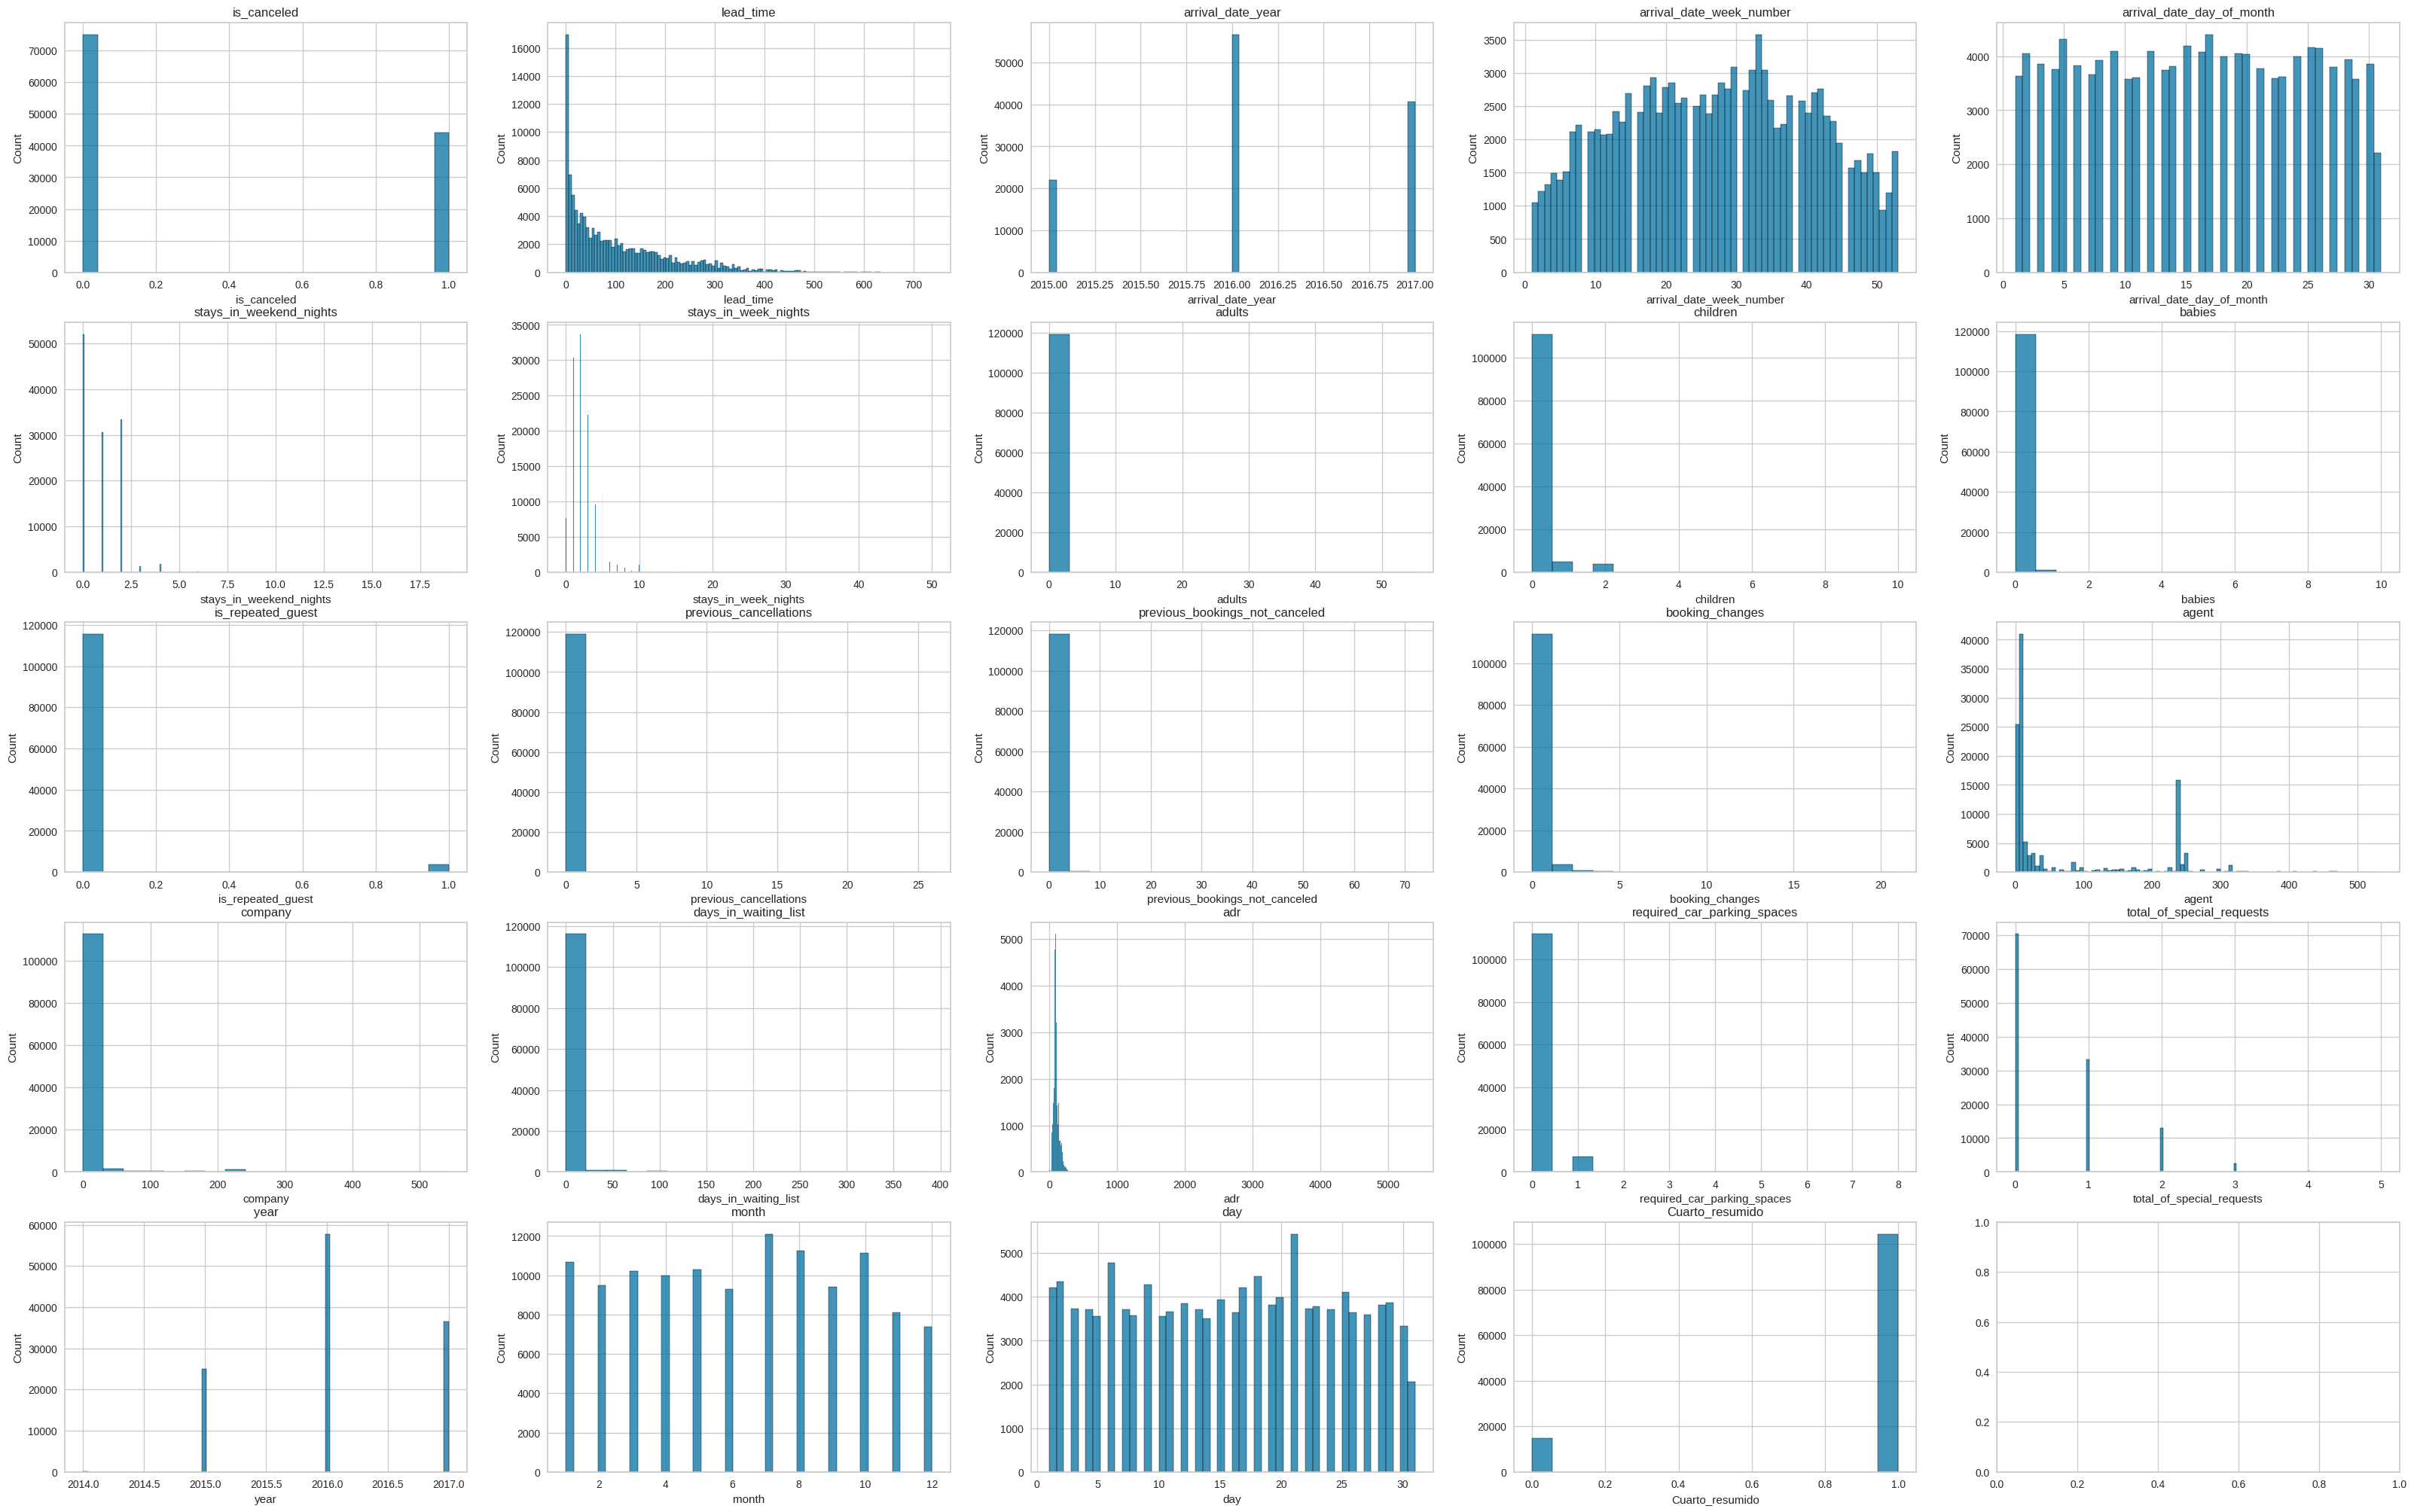

In [ ]:
fig, axes = plt.subplots(5,5, figsize = (40,25))
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
  sns.histplot(df[col], ax = axes[i])
  axes[i].set_title(col)

plt.show()

De acuerdo a lo observado, se eliminaron los apartados con valores nulos remplazandolos segun se vio necesario, en el caso de las variables categoricas, estas seran tratadas mediante OneHotEncoder, a excepcion de la variable country, debido a la alta dimensionalidad, para esta variable particular se utilizara TargetEncoder.

Asi mismo, se oservaron las variables numericas, de los graficos podemos observar que general son variables binarias que no ncesitarian tratamientos mas haya de un StandarScaler general para convservar la consistencia de datos para todos los modelos. Ademas se observo que la variable objetivo is_canceled, muestra un ligero desbalance de clase, sin embargo, no es pronunciado por lo que se pueden estratificar los datos sin problemas al momento de entrenar el modelo.


In [ ]:
columnas_numericas.remove('is_canceled')
columnas_categoricas.remove('country')
columnas_categoricas.remove('reserved_room_type')
columnas_categoricas.remove('assigned_room_type')

num_transform = Pipeline(steps=[
                                ("scaler", StandardScaler())
                                ]
                         )

cat_transform = Pipeline(steps=[
                               ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
                               ]
                         )

cat_especial_transform = Pipeline(steps=[
                                         ("target_scaler", TargetEncoder())
                                        ]
                                  )

preprocesamiento = ColumnTransformer(
                                     transformers=[
                                                  ("num", num_transform, columnas_numericas),
                                                  ("cat", cat_transform, columnas_categoricas),
                                                  ("tar", cat_especial_transform, 'country'),
                                                  ]
                                     )

model = LogisticRegression(penalty='l2', max_iter = 2000)

rfecv_selector = RFECV(
                       estimator = model,
                       step = 1,
                       cv = 5,
                       scoring = "roc_auc"
                       )

pipeline_rfecv = Pipeline(steps = [
                                   ("preprocesamiento", preprocesamiento),
                                   ("selector", rfecv_selector),
                                  ]
                         )

y = df['is_canceled']
X = df.drop(['is_canceled', 'reserved_room_type', 'assigned_room_type', 'reservation_status_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 42
                                                   )


pipeline_rfecv.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings...
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('tar',
                                                  Pipeline(steps=[('target_scaler',
                                                                   TargetEncoder())]),
                                                  'country')])),
                ('selector',
                 RFECV(cv=5, estimator=LogisticRegression(max_iter=2000),
                       scoring='roc_auc'))])

In [ ]:
selector_final = pipeline_rfecv.named_steps["selector"]

mask = selector_final.support_
selected_features = mask

print("Número de features seleccionadas:", mask.sum())

pipeline_rfecv.named_steps["preprocesamiento"].get_feature_names_out()[selector_final.support_]

Número de features seleccionadas: 1


array(['cat__reservation_status_Check-Out'], dtype=object)

Esto nos muestra un problemas que se habia pasado por alto en un principio y es la variable reservation_status, es causal, esto significa que si la persona tiene check out indudablemente no cancelo la reservacion, debido a esto nuestro modelo desecha todas las demas variables pues esta es 'perfecta', sin embargo, esta es informacion del futuro que no servira para las predicciones del modelo. por lo que esta caracteristica se desecha.

In [ ]:
y = df['is_canceled']
X = df.drop(['is_canceled', 'reserved_room_type', 'assigned_room_type', 'reservation_status_date', 'reservation_status'], axis=1)
columnas_categoricas.remove('reservation_status')

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 42
                                                   )

pipeline_rfecv.fit(X_train, y_train)

selector_final = pipeline_rfecv.named_steps["selector"]

mask = selector_final.support_
selected_features = mask

print("Número de features seleccionadas:", mask.sum())

pipeline_rfecv.named_steps["preprocesamiento"].get_feature_names_out()[selector_final.support_]

Número de features seleccionadas: 55


array(['num__lead_time', 'num__arrival_date_year',
       'num__arrival_date_week_number', 'num__arrival_date_day_of_month',
       'num__stays_in_weekend_nights', 'num__stays_in_week_nights',
       'num__adults', 'num__babies', 'num__is_repeated_guest',
       'num__previous_cancellations',
       'num__previous_bookings_not_canceled', 'num__booking_changes',
       'num__agent', 'num__company', 'num__days_in_waiting_list',
       'num__adr', 'num__required_car_parking_spaces',
       'num__total_of_special_requests', 'num__year', 'num__month',
       'num__day', 'num__Cuarto_resumido', 'cat__hotel_Resort Hotel',
       'cat__arrival_date_month_August',
       'cat__arrival_date_month_December',
       'cat__arrival_date_month_February',
       'cat__arrival_date_month_January', 'cat__arrival_date_month_July',
       'cat__arrival_date_month_June', 'cat__arrival_date_month_March',
       'cat__arrival_date_month_May', 'cat__arrival_date_month_November',
       'cat__arrival_date_mont

In [ ]:
X_train_reduced = pipeline_rfecv.transform(X_train)
X_test_reduced  = pipeline_rfecv.transform(X_test)


pipeline_rl_final = Pipeline(steps = [
                                      ("model", model)
                                     ]
                            )


param_grid_rl = {
              "model__C" : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              "model__penalty" : ["l2"],
              "model__solver" : ["sag", "saga", "newton-cg"]
             }

grid_rl = GridSearchCV(
                       estimator = pipeline_rl_final,
                       param_grid = param_grid_rl,
                       scoring = "roc_auc",
                       cv = 5,
                       n_jobs=-1
                      )

grid_rl.fit(X_train_reduced, y_train)


best_model_rl = grid_rl.best_estimator_
best_model_rl_viz = best_model_rl.named_steps["model"]

best_model_rl_viz

LogisticRegression(C=10, max_iter=2000, solver='newton-cg')

Mejor ROC AUC (CV): 0.9949094302953843


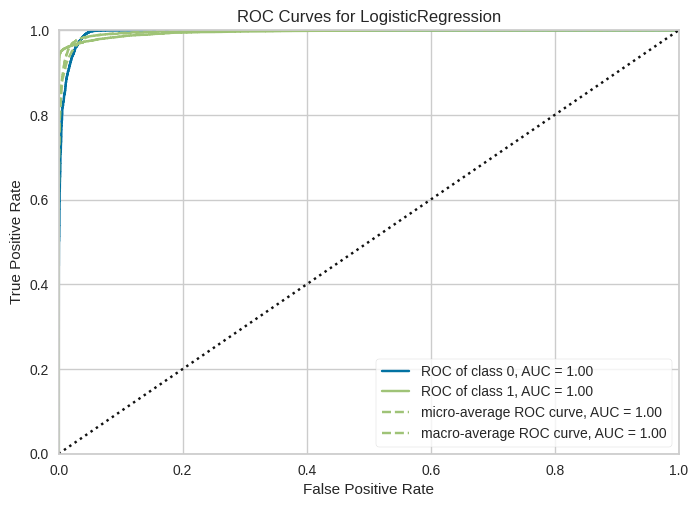

Mejores hiperparámetros: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
ROC AUC en test: 0.9954071750144573
F1 Score: 0.9631017044390335
Accuracy: 0.9735995711605467
Precision: 0.9984466019417476
Recall: 0.9301736613603473


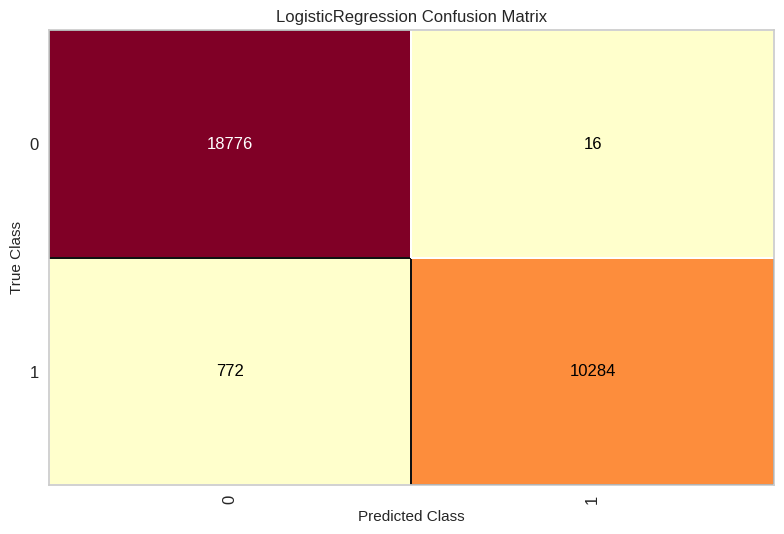

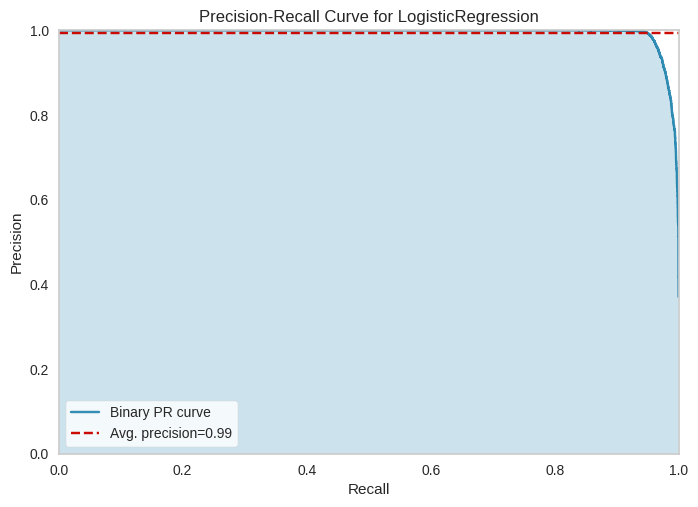

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
modelo_visualizer = LogisticRegression(C=10, max_iter = 2000, solver='newton-cg', penalty = 'l2')

print("Mejor ROC AUC (CV):", grid_rl.best_score_)

roc_vizual = ROCAUC(modelo_visualizer)
roc_vizual.fit(X_train_reduced, y_train)
roc_vizual.score(X_test_reduced, y_test)
roc_vizual.show()

print("Mejores hiperparámetros:", grid_rl.best_params_)
print("ROC AUC en test:", roc_vizual.score(X_test_reduced, y_test))


y_pred = best_model_rl.predict(X_test_reduced)

print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

cm_vizual = ConfusionMatrix(modelo_visualizer)
cm_vizual.fit(X_train_reduced, y_train)
cm_vizual.score(X_test_reduced, y_test)
cm_vizual.show()

pr_vizual = PrecisionRecallCurve(modelo_visualizer)
pr_vizual.fit(X_train_reduced, y_train)
pr_vizual.score(X_test_reduced, y_test)
pr_vizual.show()

Como se puede visualizar en las mediciones anteriores el modelo obtenido es particularmente bueno, logrando metricas extremadamente altas todas en un orden mayor al .93 , la matriz de confusion muestra que el error principal surge, para personas que el modelo piensa que cancelaran cuando en realidad no es asi, mientras que para las personas que en efecto cancelaron la reservacion el error es minimo, capturando casi la totalidad de los casos, dandonos informacion para lograr accionar con aquellos que el modelo atrapa para poner mayor cuidado con ellos. otras metricas tales como presicion recall curve o ROC curves, son particularmente utiles unicamente para ver como el modelo aumenta hasta el mehjor recall posible sin sacrificar practicamente nada de presicion

In [ ]:
resultados_rl = pd.DataFrame(grid_rl.cv_results_)
resultados_rl

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.132215,0.420844,0.012174,0.000798,0.0001,l2,sag,"{'model__C': 0.0001, 'model__penalty': 'l2', '...",0.848753,0.849465,0.853074,0.854270,0.856538,0.852420,0.002932,16
1,3.758791,0.489968,0.011375,0.000835,0.0001,l2,saga,"{'model__C': 0.0001, 'model__penalty': 'l2', '...",0.848751,0.849463,0.853073,0.854268,0.856537,0.852419,0.002932,18
2,0.520596,0.006652,0.010845,0.000291,0.0001,l2,newton-cg,"{'model__C': 0.0001, 'model__penalty': 'l2', '...",0.848752,0.849464,0.853073,0.854269,0.856538,0.852419,0.002932,17
3,6.137553,0.467681,0.011401,0.000538,0.0010,l2,sag,"{'model__C': 0.001, 'model__penalty': 'l2', 'm...",0.893426,0.893841,0.898032,0.899457,0.900051,0.896961,0.002798,14
4,16.704045,0.558725,0.011207,0.000173,0.0010,l2,saga,"{'model__C': 0.001, 'model__penalty': 'l2', 'm...",0.893420,0.893839,0.898030,0.899453,0.900049,0.896958,0.002799,15
5,1.060032,0.244484,0.018592,0.006908,0.0010,l2,newton-cg,"{'model__C': 0.001, 'model__penalty': 'l2', 'm...",0.893428,0.893846,0.898036,0.899461,0.900057,0.896966,0.002799,13
6,20.189850,0.726041,0.011159,0.000202,0.0100,l2,sag,"{'model__C': 0.01, 'model__penalty': 'l2', 'mo...",0.942344,0.944088,0.945182,0.946482,0.945738,0.944767,0.001441,11
7,38.581876,0.191579,0.011183,0.000353,0.0100,l2,saga,"{'model__C': 0.01, 'model__penalty': 'l2', 'mo...",0.942333,0.944071,0.945162,0.946466,0.945727,0.944752,0.001440,12
8,1.076991,0.157579,0.013062,0.003809,0.0100,l2,newton-cg,"{'model__C': 0.01, 'model__penalty': 'l2', 'mo...",0.942349,0.944112,0.945177,0.946642,0.945744,0.944805,0.001477,10
9,79.735941,0.784387,0.014075,0.005408,0.1000,l2,sag,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.970939,0.972747,0.972335,0.972369,0.972252,0.972128,0.000619,8


Habiendo obtenido los resultados de la regresion logistica es complicado obtener mejores modelos, pero para fines de comparacion se utilizo random forest, el motivo de esta eleccion es debido a que la metricas del modelo anterior fueron demasiado buenas, es por ello que se desea comprobar el rendimiento de un modelo conocido por tener una buena resistencia a overfitting

In [ ]:
selector_rf = SelectFromModel(RandomForestClassifier(random_state=42))

pipeline_ranf = Pipeline(steps = [
                                   ("preprocesamiento", preprocesamiento),
                                   ("selector", selector_rf),
                                  ]
                         )


X_train, X_test, y_train, y_test

pipeline_ranf.fit(X_train, y_train)

selector_final_rf = pipeline_ranf.named_steps["selector"]

mask_rf = selector_final_rf.get_support()
selected_features_rf = mask

print("Número de features seleccionadas:", mask_rf.sum())

pipeline_ranf.named_steps["preprocesamiento"].get_feature_names_out()[selector_final_rf.get_support()]

Número de features seleccionadas: 15


array(['num__lead_time', 'num__arrival_date_week_number',
       'num__arrival_date_day_of_month', 'num__stays_in_week_nights',
       'num__previous_cancellations', 'num__agent', 'num__adr',
       'num__required_car_parking_spaces',
       'num__total_of_special_requests', 'num__month', 'num__day',
       'num__Cuarto_resumido', 'cat__market_segment_Online TA',
       'cat__deposit_type_Non Refund', 'tar__country'], dtype=object)

In [ ]:
X_train_reduced_rf = pipeline_ranf.transform(X_train)
X_test_reduced_rf  = pipeline_ranf.transform(X_test)

model_rf = RandomForestClassifier(random_state=42)

pipeline_rf_final = Pipeline(steps = [
                                      ("model", model_rf)
                                     ]
                            )


param_grid_rf = {
                 "model__n_estimators": [10, 30, 60, 100, 200],
                 "model__max_depth": [None, 5, 10, 20, 30, 40],
                 "model__class_weight": [None, "balanced"],
                 "model__criterion": ["gini", "entropy"]
                }



grid_rf = GridSearchCV(
                       estimator = pipeline_rf_final,
                       param_grid = param_grid_rf,
                       scoring = "roc_auc",
                       cv = 5,
                       n_jobs=-1
                      )

grid_rf.fit(X_train_reduced_rf, y_train)


best_model_rf = grid_rf.best_estimator_
best_model_rf_viz = best_model_rf.named_steps["model"]

best_model_rf_viz

RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=200,
                       random_state=42)

Mejor ROC AUC (CV): 0.9906775250363922


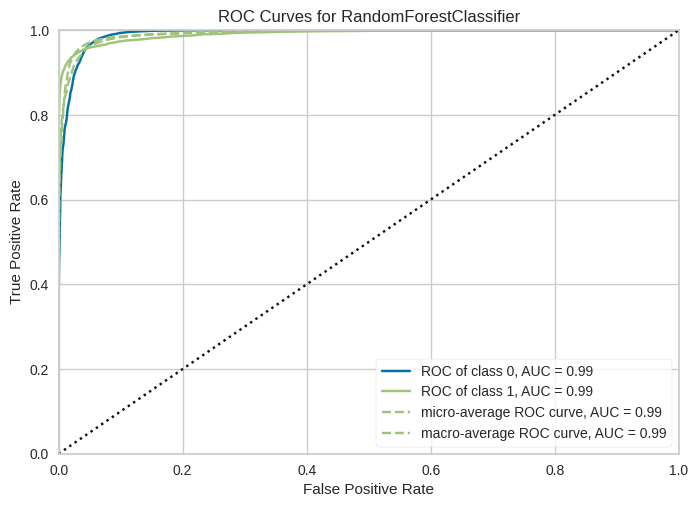

Mejores hiperparámetros: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 40, 'model__n_estimators': 200}
ROC AUC en test: 0.9913241395025179
F1 Score: 0.9466885092440908
Accuracy: 0.9618399892790137
Precision: 0.9809874866621399
Recall: 0.9147069464544139


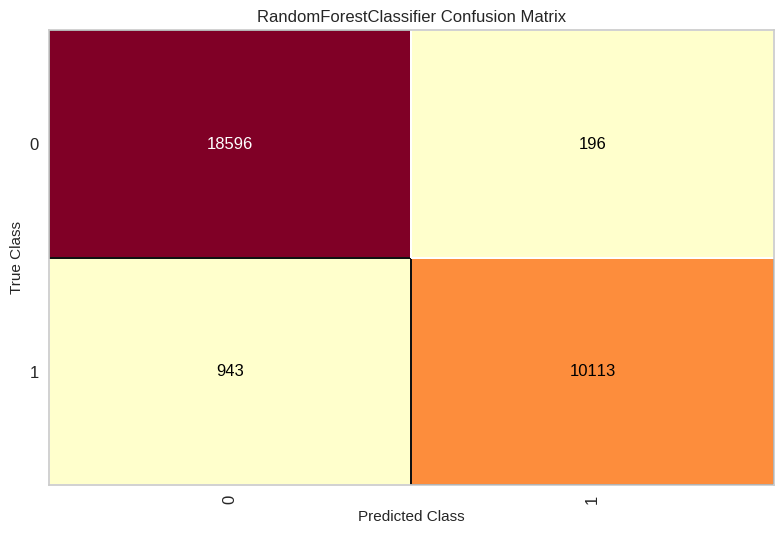

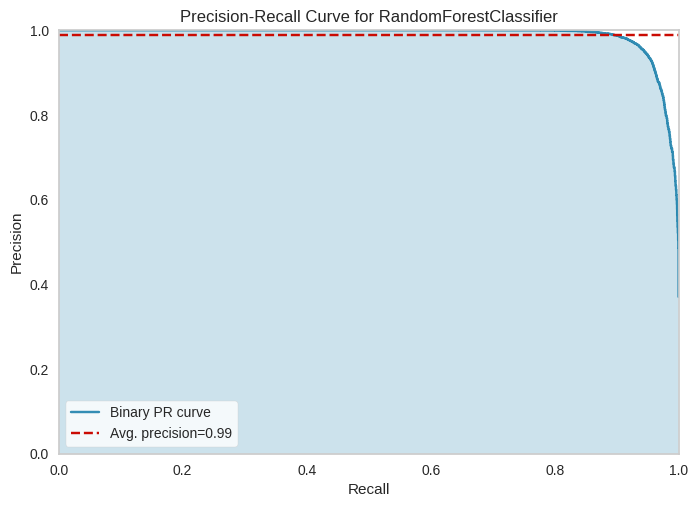

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
modelo_visualizer = RandomForestClassifier(n_estimators = 200, max_depth = 40, criterion = 'entropy', random_state = 42)

print("Mejor ROC AUC (CV):", grid_rf.best_score_)

roc_vizual = ROCAUC(modelo_visualizer)
roc_vizual.fit(X_train_reduced_rf, y_train)
roc_vizual.score(X_test_reduced_rf, y_test)
roc_vizual.show()

print("Mejores hiperparámetros:", grid_rf.best_params_)
print("ROC AUC en test:", roc_vizual.score(X_test_reduced_rf, y_test))


y_pred = best_model_rf.predict(X_test_reduced_rf)

print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

cm_vizual = ConfusionMatrix(modelo_visualizer)
cm_vizual.fit(X_train_reduced_rf, y_train)
cm_vizual.score(X_test_reduced_rf, y_test)
cm_vizual.show()

pr_vizual = PrecisionRecallCurve(modelo_visualizer)
pr_vizual.fit(X_train_reduced_rf, y_train)
pr_vizual.score(X_test_reduced_rf, y_test)
pr_vizual.show()

Si bien las metricas en general son ligeramente menores que para la regresion logistica, este modelo mostro un desempeno muy alto, con la particular ventaja de necesitar muchas menos caracterisitcas que la regresion logistica, lo cual podria tomarse en cuenta para elegir este modelo.

Sin embargo, al final se decidio quedarse con el modelo de RL con los hiperparametros {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}

In [ ]:
resultados_rf = pd.DataFrame(grid_rf.cv_results_)
resultados_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,param_model__criterion,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.932310,0.386117,0.078770,0.019209,None,gini,None,10,"{'model__class_weight': None, 'model__criterio...",0.982832,0.984061,0.980861,0.981417,0.984061,0.982646,0.001322,71
1,4.650144,0.582343,0.160823,0.029843,None,gini,None,30,"{'model__class_weight': None, 'model__criterio...",0.988159,0.989222,0.986919,0.986957,0.988553,0.987962,0.000903,47
2,9.570202,0.305439,0.301655,0.036776,None,gini,None,60,"{'model__class_weight': None, 'model__criterio...",0.989827,0.990482,0.989162,0.988370,0.989944,0.989557,0.000727,33
3,15.506104,0.560240,0.461322,0.009653,None,gini,None,100,"{'model__class_weight': None, 'model__criterio...",0.990253,0.991032,0.989826,0.989233,0.990335,0.990136,0.000595,18
4,31.684518,0.904095,1.062765,0.306044,None,gini,None,200,"{'model__class_weight': None, 'model__criterio...",0.990333,0.991099,0.989987,0.989560,0.990522,0.990300,0.000517,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.801826,0.332720,0.064477,0.020064,balanced,entropy,40,10,"{'model__class_weight': 'balanced', 'model__cr...",0.980892,0.985504,0.983647,0.982115,0.983247,0.983081,0.001545,66
116,5.028937,0.483108,0.167474,0.026254,balanced,entropy,40,30,"{'model__class_weight': 'balanced', 'model__cr...",0.987561,0.989995,0.987999,0.987722,0.988800,0.988415,0.000897,41
117,10.951874,0.624322,0.291735,0.014528,balanced,entropy,40,60,"{'model__class_weight': 'balanced', 'model__cr...",0.988991,0.990737,0.989418,0.989311,0.990344,0.989760,0.000664,28
118,17.029970,0.582612,0.581210,0.134322,balanced,entropy,40,100,"{'model__class_weight': 'balanced', 'model__cr...",0.989696,0.991103,0.989814,0.989838,0.990955,0.990281,0.000614,14


In [ ]:
y_final_predecido = best_model_rl.predict(pipeline_rfecv.transform(X))
y_proba = best_model_rl.predict_proba(pipeline_rfecv.transform(X))

In [ ]:
y_final_predecido

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_proba

array([[0.96942343, 0.03057657],
       [0.98337058, 0.01662942],
       [0.98887197, 0.01112803],
       ...,
       [0.99453095, 0.00546905],
       [0.98588665, 0.01411335],
       [0.99181055, 0.00818945]])

In [ ]:
df.index

RangeIndex(start=0, stop=119390, step=1)

In [ ]:
df_final = pd.DataFrame({
    'Clase' : y_final_predecido,
    'Probabilidades clase 1' : y_proba[:,0],
    'Probabilidades clase 2' : y_proba[:,1]
}, index = df.index)

In [ ]:
df_final

,Clase,Probabilidades clase 1,Probabilidades clase 2
0,0,0.969423,0.030577
1,0,0.983371,0.016629
2,0,0.988872,0.011128
3,0,0.986109,0.013891
4,0,0.985732,0.014268
...,...,...,...
119385,0,0.989548,0.010452
119386,0,0.989031,0.010969
119387,0,0.994531,0.005469
119388,0,0.985887,0.014113


In [ ]:
df_final.to_csv('DS_C6_SC1_JESUS_ALEJANDRO_MURILLO_PEREZ.csv')